### Calc



In [23]:
import functools
async def callee(fut, word):
    await asyncio.sleep(4)
    fut.set_result(word)

async def caller():
    loop = asyncio.get_running_loop()
    # Create a new Future object.
    fut = loop.create_future()
    loop.create_task(callee(fut, '... world'))
    fut.add_done_callback(functools.partial(print, "Future:"))
    print('test')

await caller() # for jupyter notebook, becouse loop is already running in jupyter
# asyncio.run(main()) # for py file

test


Future: <Future finished result='... world'>


In [12]:
def coroutine_example():
    value = yield "I yield this value, but I can receive as well!"
    yield f"Received: {value}"

# To use this generator-based coroutine, you need to "prime" it first by calling next().
coro = coroutine_example()
print(next(coro))  # Start the coroutine, which will print 'I yield this value, but I can receive as well!'

# Send a value into the coroutine
# print(coro.send(10))  # Outputs 'Received: 10'


I yield this value, but I can receive as well!


In [4]:
obj = { "a": 1, "b": 2 }
obj.setdefault("b", 3)


2

In [18]:
import pandas as pd


In [21]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


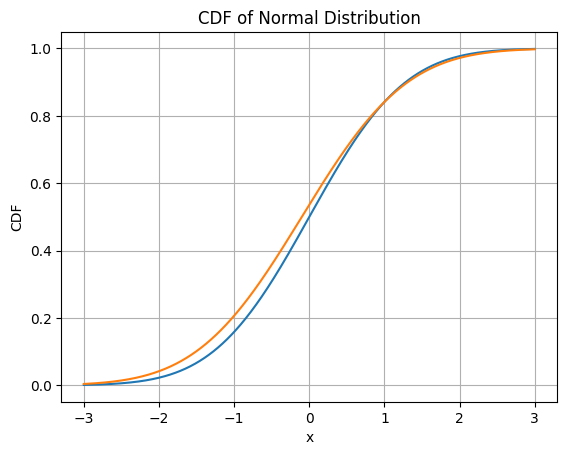

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters for the normal distribution
mu = 0  # Mean
sigma = 1  # Standard deviation

# Generate a range of x values
x = np.linspace(-3, 3, 1000)

# Calculate the CDF values for the given x values
cdf = norm.cdf(x, loc=mu, scale=sigma)
cdf2 = norm.cdf(x, loc=-0.1, scale=1.1)
# Plot the CDF
plt.plot(x, cdf)
plt.plot(x, cdf2)
plt.title('CDF of Normal Distribution')
plt.xlabel('x')
plt.ylabel('CDF')
plt.grid(True)
plt.show()


In [349]:
x2 = stats.norm.rvs(size=10000, loc=0, scale=1, random_state=rng)
stats.kstest(x2, stats.norm.cdf)



KstestResult(statistic=0.0066247748074562685, pvalue=0.7698031933932008, statistic_location=0.5350004449362551, statistic_sign=1)

<Axes: >

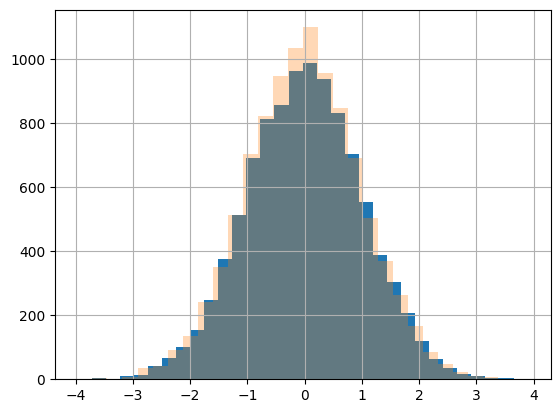

In [343]:
ax = pd.Series(x).hist(bins=30)
pd.Series(x2).hist(bins=30, ax=ax, alpha=0.3)

In [351]:
import os, os.path, sys
t = os.path.join(os.path.dirname(os.path.abspath(__file__)), ".pip_wtf." + os.path.basename(__file__))
# sys.path = [p for p in sys.path if "-packages" not in p] + [t]
# os.environ["PATH"] += os.pathsep + t + os.path.sep + "bin"
# os.environ["PYTHONPATH"] = os.pathsep.join(sys.path)
# if os.path.exists(t): return
# os.system(" ".join([sys.executable, "-m", "pip", "install", "-t", t, command]))

NameError: name '__file__' is not defined

In [3]:

import os, os.path, sys
t = os.path.join(os.path.dirname(os.path.abspath('__file__')), ".pip_wtf." + os.path.basename('__file__'))
sys.path = [p for p in sys.path if "-packages" not in p] + [t]
# os.environ["PATH"] += os.pathsep + t + os.path.sep + "bin"
# os.environ["PYTHONPATH"] = os.pathsep.join(sys.path)
# if os.path.exists(t): return
# os.system(" ".join([sys.executable, "-m", "pip", "install", "-t", t, command]))

# Now you just call it to install your packages:
#   pip_wtf('the rest of the pip install command here')



In [6]:
os.pathsep + t + os.path.sep + "bin"

':/Users/maxymusenko/Programming/knowledge_base/.pip_wtf.__file__/bin'

In [9]:
class SimpleObject:
  greet_name:str

  # def __new__(cls, *args, **kwargs):      # <-- newly added function
  #   print("__new__ method")               
  #   return super().__new__(cls)            

  def __init__(self, name:str):
    print("__init__ method")
    self.greet_name = name

  def say_hello(self) -> None:
    print(f"Hello {self.greet_name}!")
    

In [10]:
# 1. __new__ and __init__ are called internally
# my_instance = SimpleObject(name='bob')

# 2. __new__ and __init__ are called directly:
my_instance = SimpleObject.__new__(SimpleObject)
my_instance.__init__(name='bob')
my_instance.say_hello()

__init__ method
Hello bob!


In [27]:
class Currency(float):

    def __new__(cls, value: float, symbol: str):
        obj = super().__new__(cls, value)
        obj.symbol = symbol
        return obj

    def __str__(self) -> str:
        return f"{self.symbol} {self:.2f}"  # <-- returns symbol & float formatted to 2 decimals


price = Currency(12.768544, symbol='€')
print(price)  

€ 12.77


In [4]:
l = [1,2,4]
match l:
    case  [1,2,3]:
        print(True)
        # This is a "Close with comment" comment. Don't do anything for the
        # comment, because we'll also get a "pull request closed" event at
        # the same time, and it will do whatever we need.
        pass

AUC-ROC Score: 0.8437


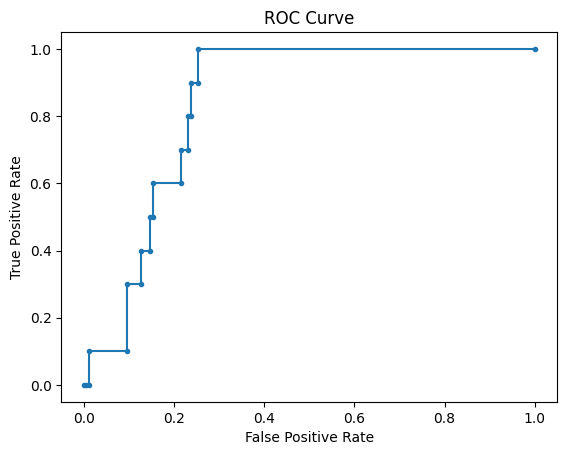

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Generate true labels
true_labels = np.array([1]*10 + [0]*90 + [1]*0 + [0]*100)  # TP=10, FN=0, FP=90, TN=100

# Step 2: Generate predicted probabilities
# Simulate the probabilities: for simplicity, assume TP have higher probabilities, TN have lower, FP have higher, FN have lower
# This is just a basic simulation; real probabilities should come from a model
predicted_probabilities = np.concatenate([
    np.random.uniform(0.6, 1.0, 10),  # TP
    np.random.uniform(0.0, 0.4, 0),   # FN (empty in this case)
    np.random.uniform(0.6, 1.0, 70),  # FP
    np.random.uniform(0.0, 0.4, 120)  # TN
])

# Step 3: Calculate AUC-ROC score
auc_roc = roc_auc_score(true_labels, predicted_probabilities)

# Print the AUC-ROC score
print(f"AUC-ROC Score: {auc_roc:.4f}")

# Plot ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(true_labels, predicted_probabilities)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
